In [2]:
from scipy.stats import shapiro, kstest, ks_2samp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dt = pd.read_csv('train.csv')

In [4]:
dt = dt[dt['Age'].notnull()]

In [5]:
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Normality test for Age (Shapiro Wilk Test)

In [70]:
w_statistic, pvalue = shapiro(dt['Age'])

In [71]:
print('W-statistic:', w_statistic, 'P-value:',pvalue)

W-statistic: 0.9814548492431641 P-value: 7.322165629375377e-08


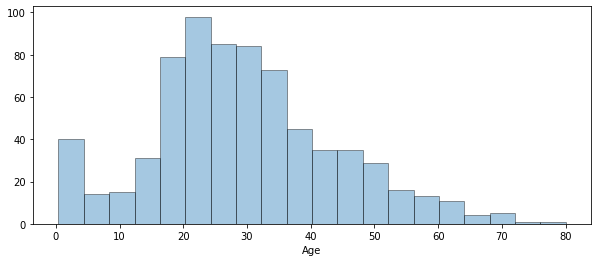

In [72]:
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(dt['Age'],kde=False, hist_kws={'edgecolor':'black'})

### Normality test for Age ( Kolmogorov-Smirnov test )

In [4]:
mean = np.mean(dt['Age'])
std = np.std(dt['Age'])
no = len(dt)
normal_age = np.random.normal(mean,std,no)

In [5]:
d_statistic, pvalue = kstest(dt['Age'],'norm',args=(mean,std))

In [6]:
print('D-statistic:', d_statistic, 'P-value:',pvalue)

D-statistic: 0.06456077657008552 P-value: 0.00496347192487969


In [7]:
dt['normal_age'] = normal_age

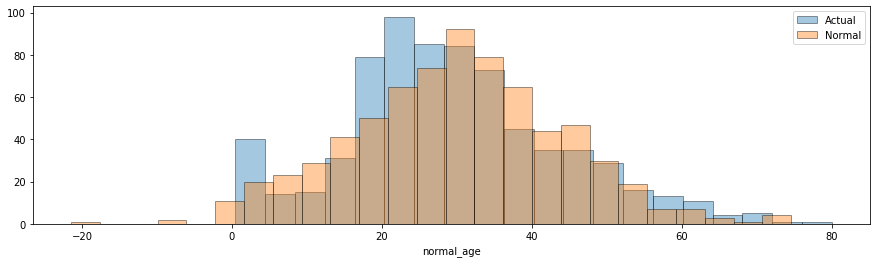

In [9]:
fig, ax = plt.subplots(figsize=(15,4))
sns.distplot(dt['Age'],kde=False, hist_kws={'edgecolor':'black'})
sns.distplot(dt['normal_age'], kde=False, hist_kws={'edgecolor':'black'})
plt.legend(['Actual','Normal'])

In [10]:
sorted_age = dt['Age'].sort_values()
normal_age.sort()

In [11]:
p = 1. * np.arange(len(sorted_age)) / (len(sorted_age) - 1)
p_normal = 1 * np.arange(len(normal_age)) / (len(normal_age) - 1)

Text(0.5, 0, 'Age')

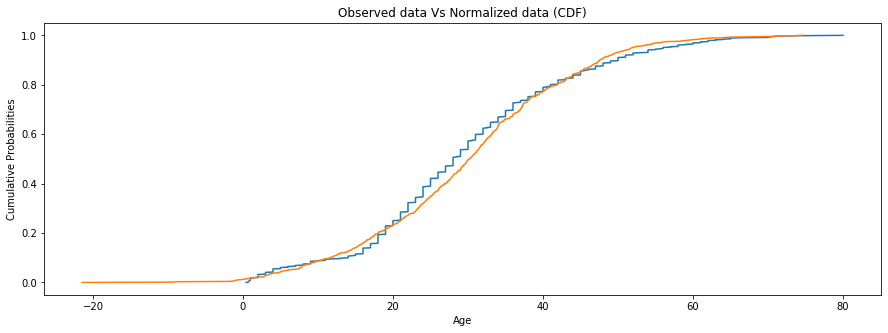

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(sorted_age, p)
plt.plot(normal_age, p_normal)
plt.title('Observed data Vs Normalized data (CDF)')
plt.ylabel('Cumulative Probabilities')
plt.xlabel('Age')

### Manual Shaprio wilk test

In [2]:
my_list = [1,5,15,20]

In [4]:
shapiro(my_list)

(0.9391947388648987, 0.6494224667549133)

In [8]:
mean = np.mean(my_list)
mean

10.25

In [13]:
variance = sum((my_list-mean)**2)

In [15]:
a1 = 0.6872
a2 = 0.1677

In [26]:
diff1 = my_list[3]-my_list[0]
diff2 = my_list[2]-my_list[1]

In [37]:
b_square = ((a1*diff1)+ (a2*diff2))**2
b_square

217.08486244000002

In [38]:
w_statistics = b_square/variance

In [39]:
w_statistics

0.9407794688624053